# 311 Systems report

### Clicking the soda link will just download you the relevant columns
[*311 complaint dataset*](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
[**311 Soda Download link**](https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
). 
[*PLUTO dataset for housing*](https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/xuk2-nczf). 
 

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

### Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

In [22]:
# Import librarys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap
fig = (10,10) 



In [23]:
# Import Data
df_1 = pd.read_csv('./NYCdata.csv', parse_dates=False)


In [24]:
print(df_1.shape,df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6020177 entries, 0 to 6020176
Data columns (total 15 columns):
created_date              object
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: float64(3), int64(1), object(11)
memory usage: 689.0+ MB
(6020177, 15) None


### New York City Open Data data file web site indicated that the complaint type "HEAT/HOT Water" was renamed from "HEATING" after 2014. So we should combine these two types into one.


In [25]:
# Combines complaint types 
df_1['complaint_type'] = np.where(df_1['complaint_type']=='HEATING','HEAT/HOT WATER',df_1['complaint_type'])
df_1["complaint_type"].value_counts()

HEAT/HOT WATER            2149506
PLUMBING                   711184
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451689
PAINT - PLASTER            361257
PAINT/PLASTER              346473
ELECTRIC                   307330
NONCONST                   260890
DOOR/WINDOW                205293
WATER LEAK                 193649
GENERAL                    151325
FLOORING/STAIRS            137427
APPLIANCE                  112838
HPD Literature Request      52830
SAFETY                      51533
OUTSIDE BUILDING             7143
ELEVATOR                     6727
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric                        1
Name: complain

### Drop irrelevant information for answering and to help with processing

In [26]:
print(df_1["location_type"].value_counts())
print(df_1["address_type"].value_counts())

RESIDENTIAL BUILDING    5960238
Residential Building       7098
Apartment                     5
Building-Wide                 4
Public Area                   2
Name: location_type, dtype: int64
ADDRESS    5935406
Name: address_type, dtype: int64


### In the Below shows that the value count of only open tickets leans towards construction being a bigger issue with general constuction being 1st and the others being lower and Heat/Hot Water coming in fourth. This is likely due to the time (instructor made his in mid 2018) difference from when this was originally put up as a project. Additionally, in the example they provide the instructor does not take open and closed tickets into account which is another likely error. 


In [27]:
df_2 = df_1.loc[df_1['status'] == "Open"]
f1 = plt.figure(1)
df_2["complaint_type"].value_counts().head(10).plot(kind='bar',x='Complaint Type',y='Amount', color="Green")
plt.title("Only Open Tickets",fontweight="bold")

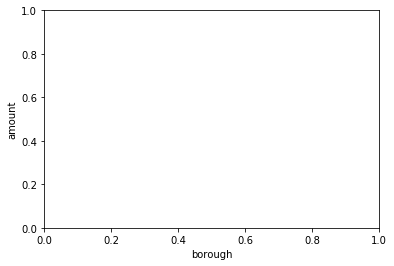

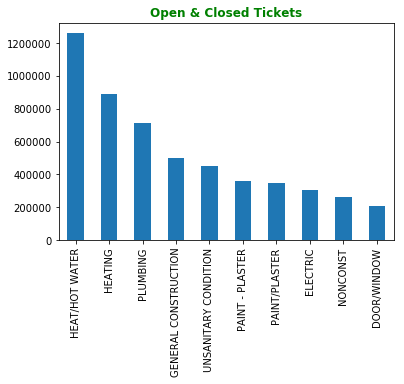

In [20]:
f1 = plt.figure(2)
plt.title("Open & Closed Tickets",fontweight="bold")
df_1["complaint_type"].value_counts().head(10).plot(kind='bar',x='Complaint Type',y='Amount', color="Green")
plt.show()

### In below we can see that Location_type and Address_type are 100% Residental so they're unneeded in answering this question. We can see that status is considered irrelevant as we're told that it should be Heating/Hot Water which is only achievable if you ignore the open to closed ticket status. 

In [17]:
#We can see that location type is only resedential so this is not needed. 
unwanted_col = ["address_type",'resolution_description','closed_date',"location_type","status"]
df_1.drop(unwanted_col, axis=1, inplace = True)
df_1.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude
0,2020-02-02T14:24:34.000,45528837,SAFETY,11229.0,1862 EAST 14 STREET,EAST 14 STREET,BROOKLYN,BROOKLYN,40.604330,-73.958402
1,2020-02-02T12:05:51.000,45527544,HEAT/HOT WATER,10026.0,312 WEST 114 STREET,WEST 114 STREET,NEW YORK,MANHATTAN,40.803309,-73.956800
2,2020-02-02T18:37:15.000,45529780,GENERAL,11233.0,305 DECATUR STREET,DECATUR STREET,BROOKLYN,BROOKLYN,40.681707,-73.931240
3,2020-02-02T11:47:36.000,45528468,HEAT/HOT WATER,11203.0,383 EAST 52 STREET,EAST 52 STREET,BROOKLYN,BROOKLYN,40.651331,-73.928370
4,2020-02-02T18:13:17.000,45531148,HEAT/HOT WATER,11104.0,39-88 49 STREET,49 STREET,Sunnyside,QUEENS,40.746623,-73.915167


### Ensure the correct Dtypes to help with processing for the information

In [18]:
print(df_1.dtypes)

created_date         object
unique_key            int64
complaint_type       object
incident_zip        float64
incident_address     object
street_name          object
city                 object
borough              object
latitude            float64
longitude           float64
dtype: object


### Question is directed at all of the New_York_City district so no need to remove areas - https://en.wikipedia.org/wiki/New_York_City

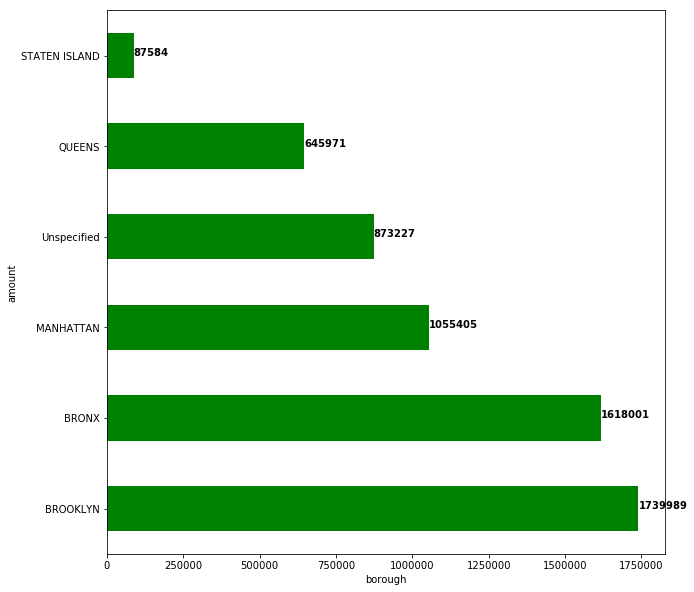

In [30]:
# Returns highest occuring areas
bor_val_count = df_1["borough"].value_counts()
plt.xlabel("borough")
plt.ylabel("amount")
bor_val_count.plot(kind='barh', figsize=fig, color="Green")

for index, value in enumerate(bor_val_count):
    plt.text(value , index, str(value), color='black', fontweight='bold')

plt.show()

In [31]:
df_1['created_year'] = pd.DatetimeIndex(df_1['created_date']).year
df_1['created_month'] = pd.DatetimeIndex(df_1['created_date']).month

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6020177 entries, 0 to 6020176
Data columns (total 17 columns):
created_date              object
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
created_year              int64
created_month             int64
dtypes: float64(3), int64(3), object(11)
memory usage: 780.8+ MB


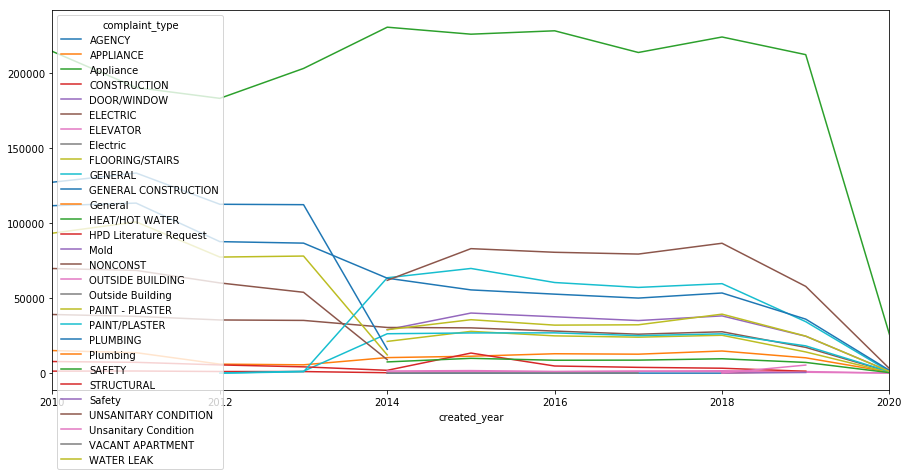

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
df_1.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)
plt.show()

# 311 Systems Summary - concluding remarks

The most common non-emergency that I'd originally identified was General/Constructions as I'd removed the Closed tickets as they would be the ones that need to be identified. Afterward, I saw that the quiz of the same section listed Heat/water and heating as the common issue I restructured the analysis of the data and found by leaving the closed tickets we can reach the same conclusion as the quiz in which Heat/Water and Heating are the most after being condensed and ignoring that there are multiple tickets closed and wouldn't be necessary to answer which to address first. Though this is likely an oversight by the instructors as it seems unusual to skip closed tickets in answering.

Also, it's probably fine to leave the tickets as unfiltered for opening and closing as we can see that the Heat/Hot Water complaint types are the quickest to solve and likely one of the reasons for leaving alone. 

General/Construction, Showed that the most common issues were in Manhattan and that the northern section around Saint Nicholas Park. For Water/Heat and Heating we can see that the common issue is around the Bronx & Brooklyn, when confirming with Google & Wikipedia we can see that they're in the top 10 most densely populated areas in America. The difference between Brooklyn and the Bronx was only 2% though this is equal to more than 30,000 over 10 years is not as much. - https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population_density- 

As density does not properly explain why there are more heat hot water issues in these areas compared to Manhattan which is considered the densest. I believe we'll need to check the information provided in the pluto dataset to see if the time of construction or if the issue is to do with wealth in the areas. My other hypothesis is that this will appear more in the winter as heat and hot water will be more likely to be checked then due to the increasing cold and people using the facilities. 

2019 & 2020 doesn't show much improvement as articles show the same issue is at hand - https://thecity.nyc/2019/10/most-heat-and-hot-water-complaints-come-from-the-bronx.html